In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

img_scale : asinh
img_scale : asinh
img_scale : asinh


<IPython.core.display.Javascript object>


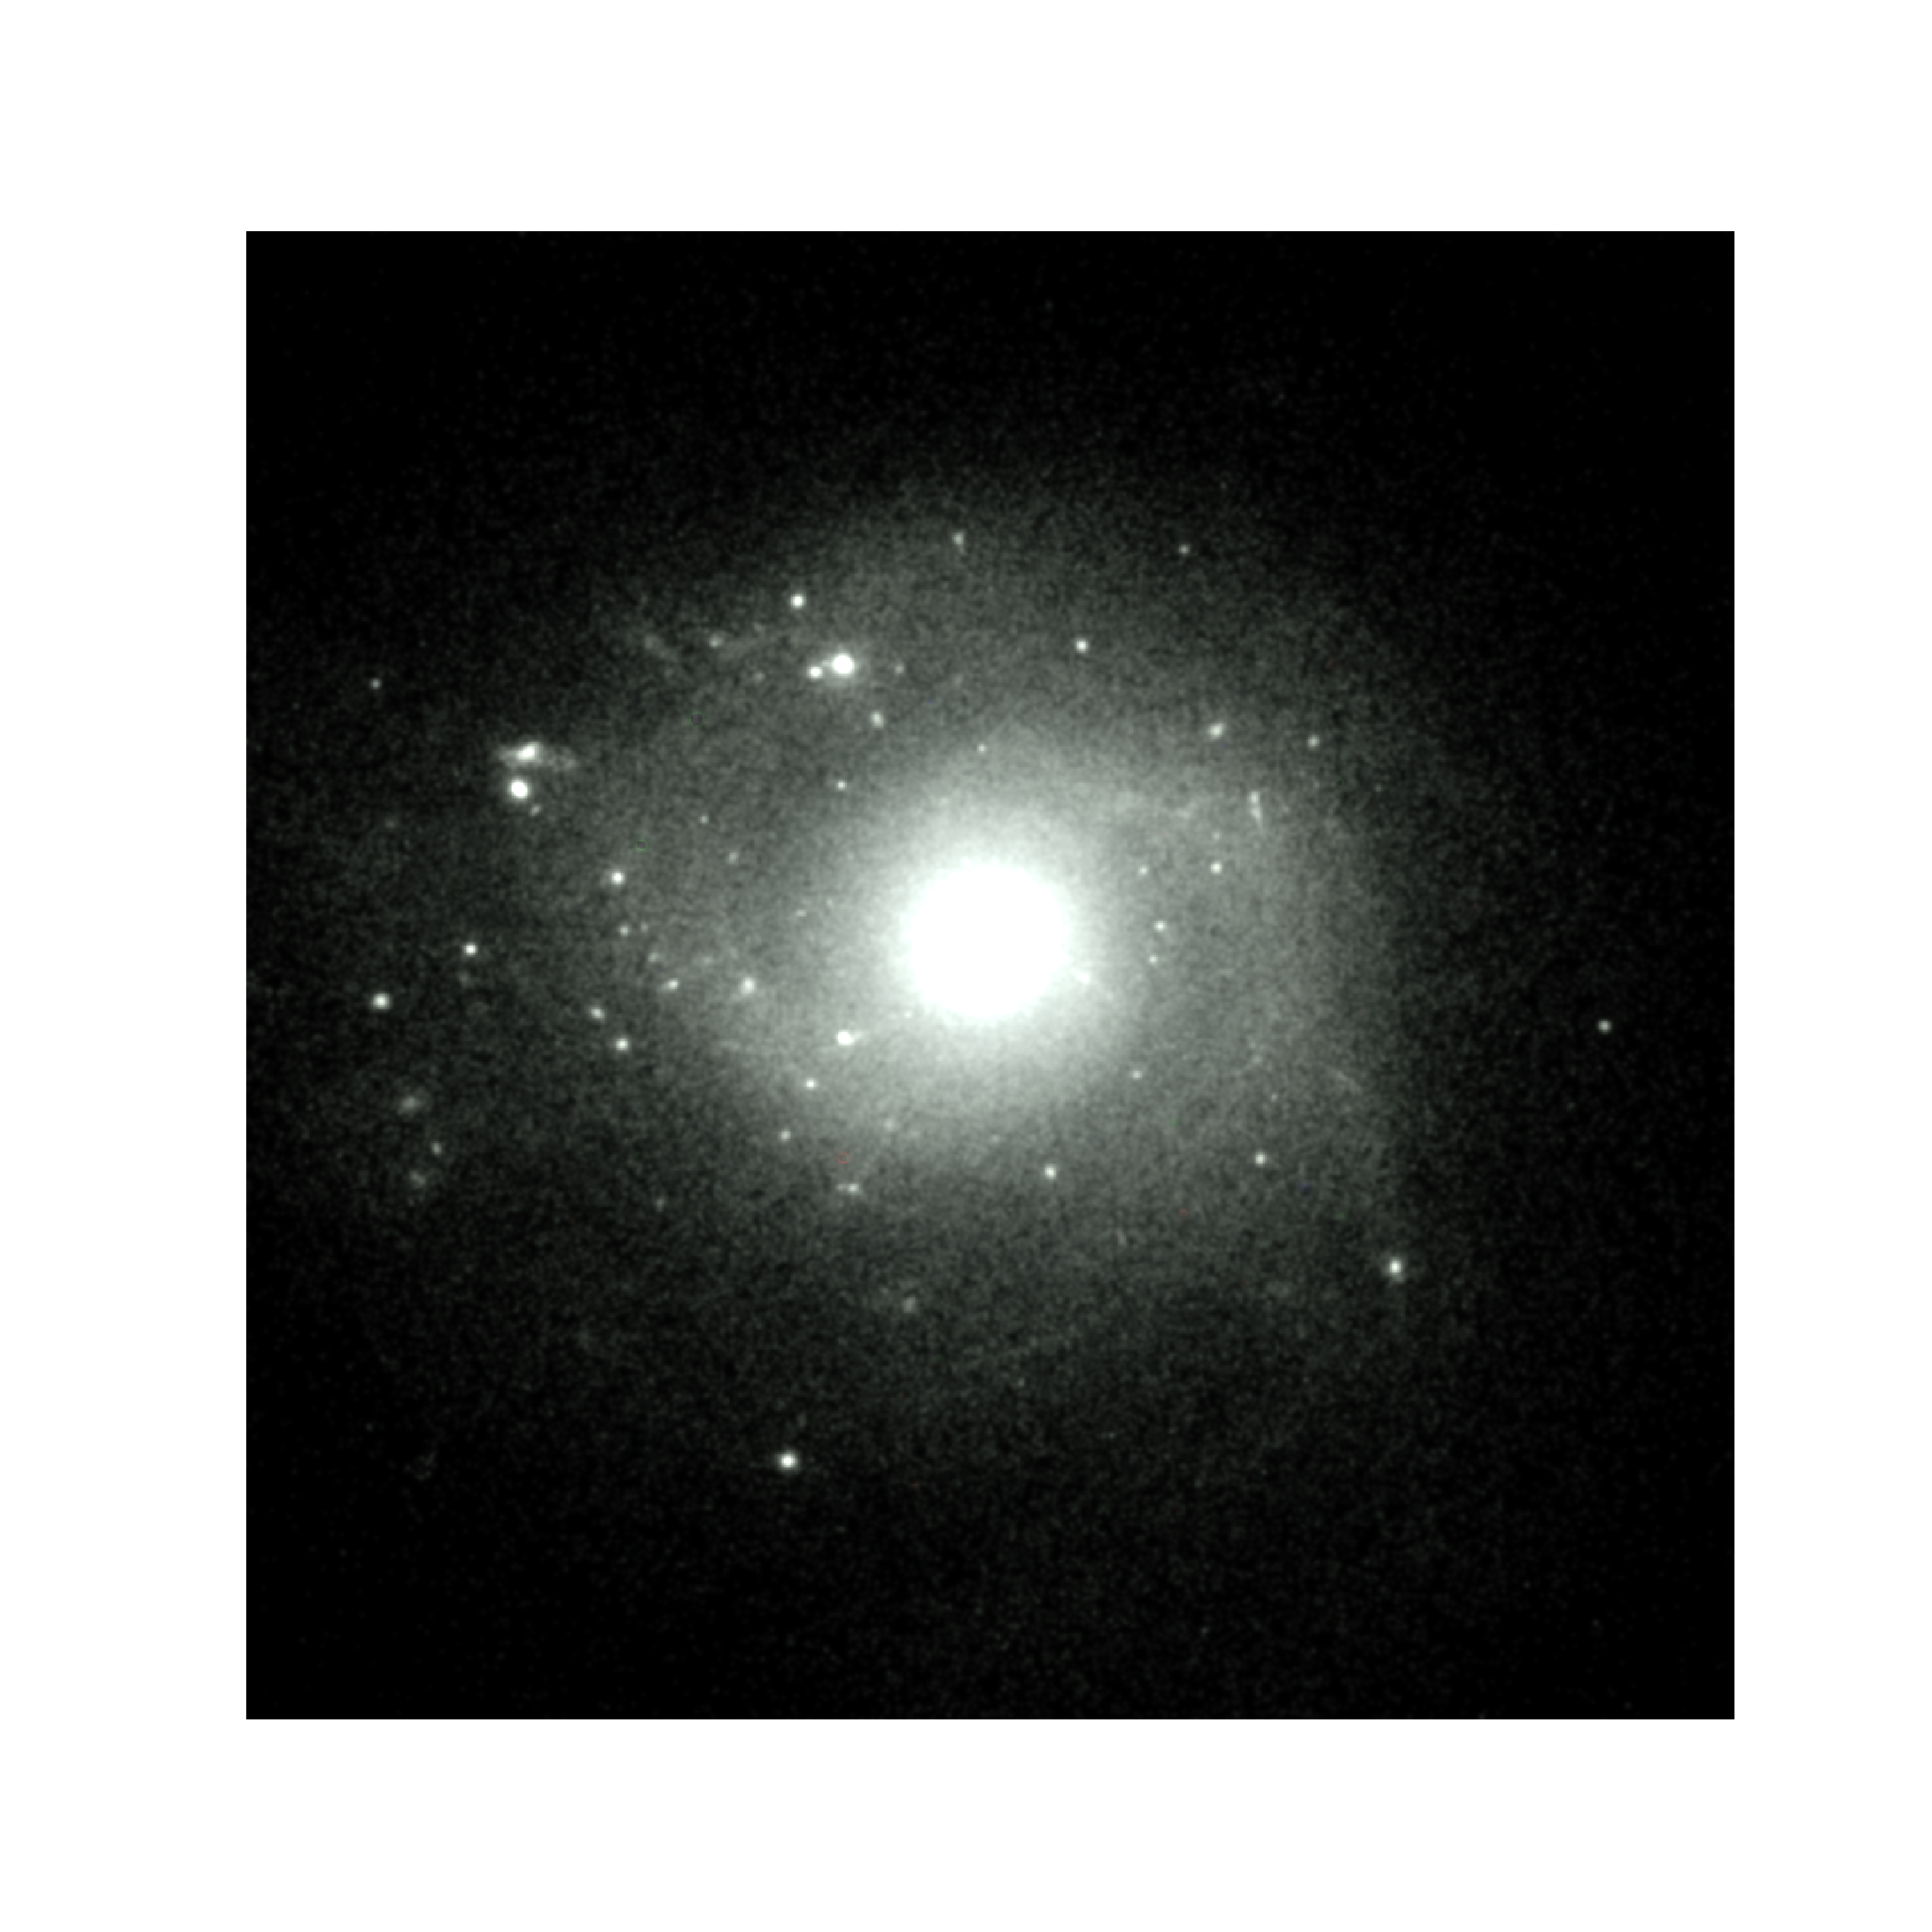

1.1105809211730957


In [3]:
import pyfits
import numpy as np
import pylab as py
import img_scale
import matplotlib.pyplot as plt

 
j_img = pyfits.getdata('/home/arturo/works/skymaker/myskys/Mo_SF1DE/faceR_SF1DE.fits')
h_img = pyfits.getdata('/home/arturo/works/skymaker/myskys/Mo_SF1DE/faceB_SF1DE.fits')
k_img = pyfits.getdata('/home/arturo/works/skymaker/myskys/Mo_SF1DE/faceU_SF1DE.fits')

img = np.zeros((j_img.shape[0], j_img.shape[1], 3), dtype=float)
lmin, lmax = 0, 1e6

img[:,:,0] = img_scale.asinh(k_img, scale_min=lmin)#, scale_max=lmax)
img[:,:,1] = img_scale.asinh(h_img, scale_min=lmin)#, scale_max=lmax)
img[:,:,2] = img_scale.asinh(j_img, scale_min=lmin)#, scale_max=lmax)
img -= img.min()
img *= 4.

array = img[:,:,0]+img[:,:,1]+img[:,:,2]
bkg_r = (img[:,:,1]+img[:,:,2])/2.
bkg_g = (img[:,:,0]+img[:,:,2])/2.
bkg_b = (img[:,:,0]+img[:,:,1])/2.

n_sigma = 1.5
outliers_r = np.where(img[:,:,0]> n_sigma*bkg_r)
img2 = img
img2[outliers_r[0],outliers_r[1],0] = bkg_r[outliers_r]

outliers_g = np.where(img[:,:,1]> n_sigma*bkg_g)
img2[outliers_g[0],outliers_g[1],1] = bkg_g[outliers_g]

outliers_b = np.where(img[:,:,2]> n_sigma*bkg_b)
img2[outliers_b[0],outliers_b[1],2] = bkg_b[outliers_b]

fig, ax =plt.subplots(figsize=[20,20])
plt.axis('off')
print img2.max()
ax.imshow(img2,vmin=0, vmax=2*img2.max())
ax.tick_params(axis='both', which='major', labelsize=0, size=5,width=1.2)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("/home/arturo/Pictures/galaxy.png")